In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\min\Desktop\데이터분석프로젝트_VER2_210329_210926.xlsx') # 엑셀 불러오기

In [3]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [4]:
del df['tax_free_amount'] # tax_free_amount 삭제

In [5]:
df.drop(df.loc[df['type'] == 'ORDER'].index, inplace = True) # 빨간색 칠 된 항목들 제거 밑도 동일

In [6]:
df.drop(df.loc[df['type'] == 'TRANSACTION'].index, inplace = True)

In [7]:
df.drop(df.loc[df['state'] == 'PENDING'].index, inplace = True)

In [8]:
df.drop(df.loc[df['state'] == 'CANCELLED'].index, inplace = True)

In [9]:
df.drop(df.loc[df['state'] == 'HIDDEN'].index, inplace = True)

In [10]:
df.drop(df.loc[df['state'] == 'DELETED'].index, inplace = True)

In [11]:
df.isnull().sum() # 결측치 확인

id                            0
customer_id                   0
course_id                  2156
type                          0
state                         0
course_title                  1
category_title                4
format                        1
completed_at                  0
transaction_amount            0
coupon_title              32975
coupon_discount_amount    32975
sale_price                 1080
pg                        10351
method                        4
subcategory_title         10307
marketing_start_at        10055
dtype: int64

In [12]:
df.loc[df['course_id'] != df['course_id'], 'course_id'] = 111111 # 결측치 course_id 111111 으로 통일

In [13]:
df.isnull().sum() # 확인

id                            0
customer_id                   0
course_id                     0
type                          0
state                         0
course_title                  1
category_title                4
format                        1
completed_at                  0
transaction_amount            0
coupon_title              32975
coupon_discount_amount    32975
sale_price                 1080
pg                        10351
method                        4
subcategory_title         10307
marketing_start_at        10055
dtype: int64

In [14]:
df[df['course_id'] == 111111].head(10) # 111111 항목만 확인(10개)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
18,970682,478031.0,111111.0,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
48,970750,478091.0,111111.0,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 16:35:04,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
57,970789,478098.0,111111.0,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 16:52:29,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
94,970947,271544.0,111111.0,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 18:15:38,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
100,970968,458508.0,111111.0,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 한끝세트 (3월 프리패스),부동산/금융,올인원,2021-03-28 18:22:16,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
118,971012,428657.0,111111.0,PAYMENT,COMPLETED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 18:44:19,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
122,971021,88880.0,111111.0,PAYMENT,COMPLETED,프로모션 : 사수없이 고민말고! 필요할 때 꺼내보는 마케팅 백과사전 한끝세트 (3월...,마케팅,올인원,2021-03-28 18:51:21,640000,NaN,NaN,640000.0,NaN,CARD,NaN,NaT
123,971026,475517.0,111111.0,PAYMENT,COMPLETED,프로모션 : 2021 내 연봉을 바꿔 줄 직장인 스킬업 한끝세트 (3월 프리패스),업무 생산성,올인원,2021-03-28 18:53:11,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
125,971030,475517.0,111111.0,PAYMENT,COMPLETED,프로모션 : 투자의 방향성을 세우는 기업분석 한끝세트 (3월 프리패스),부동산/금융,올인원,2021-03-28 18:54:01,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
127,971035,75628.0,111111.0,PAYMENT,COMPLETED,프로모션 : 투자의 방향성을 세우는 기업분석 한끝세트 (3월 프리패스),부동산/금융,올인원,2021-03-28 18:55:56,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT


In [15]:
df['transaction_amount'].sum() # 매출액 합계 80억

8014607157

In [16]:
df[df['course_title'].isnull()] # course_title 없는 애들 

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
47361,1117129,549990.0,111111.0,PAYMENT,COMPLETED,NaN,NaN,NaN,2021-06-02 16:48:37,10500000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT


In [17]:
df[df['category_title'].isnull()] # category_title 없는 애들

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
41878,1078156,62566.0,111111.0,REFUND,COMPLETED,프로모션 : 자유이용권 (3월),NaN,온라인,2021-05-26 22:06:00,-199000,NaN,NaN,199000.0,NaN,TRANSFER,NaN,NaT
47361,1117129,549990.0,111111.0,PAYMENT,COMPLETED,NaN,NaN,NaN,2021-06-02 16:48:37,10500000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
72639,1212937,591404.0,111111.0,PAYMENT,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-12 23:38:42,990000,NaN,NaN,990000.0,INICIS,CARD,NaN,NaT
74975,1223480,598011.0,111111.0,PAYMENT,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-18 12:31:01,990000,NaN,NaN,990000.0,INICIS,CARD,NaN,NaT


In [18]:
df[df['format'].isnull()] # format 없는 애들

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
47361,1117129,549990.0,111111.0,PAYMENT,COMPLETED,NaN,NaN,NaN,2021-06-02 16:48:37,10500000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT


# course, category, format 항목들 제거 할지말지 고민 2개로 나눠서 진행. 지운거, 안 지운거

In [19]:
df[df['sale_price'].isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
631,972364,478743.0,204039.0,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,100000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
633,972365,478745.0,203352.0,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 08:57:12,750000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
1194,974008,479366.0,204129.0,PAYMENT,COMPLETED,(B2B) 주식회사 비바리즈 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 14:56:46,200000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
1312,976595,480387.0,204486.0,PAYMENT,COMPLETED,(B2B) 웰컴금융그룹 온라인 구독 싱글 플랜,교육,B2B 온라인,2021-03-29 16:43:59,1194000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
1458,984569,483121.0,204534.0,PAYMENT,COMPLETED,(B2B) (주)하나아이씨티 온라인 구독 올 플랜(추가) - 비대면바우처,교육,B2B 온라인,2021-03-29 18:29:07,390000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104831,1361297,669386.0,207667.0,PAYMENT,COMPLETED,(B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,390000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
104832,1361312,669400.0,207555.0,PAYMENT,COMPLETED,(B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,1200000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
104905,1367252,672301.0,207714.0,PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,2000000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT
105163,1367258,672307.0,207731.0,PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,600000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT


In [20]:
df['course_title'].mode() # course_title 중 최빈값

0    초격차 패키지 : 한 번에 끝내는 프론트엔드 개발
dtype: object

In [21]:
df['category_title'].mode() # category_title 중 최빈값

0    프로그래밍
dtype: object

In [22]:
df['format'].mode() # format 중 최빈값

0    올인원
dtype: object

In [23]:
df['coupon_discount_amount'].sum() # 쿠폰 할인액 약 13억

1306368465.0

## 카테고리 타이틀 너무 낮은값들 전부 확인


In [24]:
df['category_title'].value_counts()

프로그래밍       19067
데이터사이언스      7354
업무 생산성       6970
디자인          6174
영상/3D        5522
마케팅          5078
부동산/금융       3013
투자/재테크       1597
크리에이티브        955
교육            932
비즈니스           24
지식콘텐츠          23
파이낸스           19
데이터 사이언스        5
관리              1
Name: category_title, dtype: int64

#### 비즈니스 , 지식콘텐츠, 파이낸스, 관리는 합쳐서 처리해야 할 것 같음

## 그래서 이런것들을 어떻게 마케팅해서 살릴것이냐? -> 일전에 생각한 방법으로는 올인원 강의로 묶어서 팔 수 있지 않을까? 또는 할인률을 높인다 등의 방법이 있을듯함

## 반대의 상황. 잘 팔리고 있는 것들에 대해선? 이것 또한 강의 판매율이 높은 시간, 가격대에서 할인이나 광고를 추가적으로 하는 방법이 있을듯함

In [25]:
df['course_title'].value_counts()

초격차 패키지 : 한 번에 끝내는 프론트엔드 개발               1544
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터    1522
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집               1278
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법    1119
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍         896
                                          ... 
(B2B) 현대오토에버 온라인 싱글 플랜 - 직장인파이썬분석 포팅건        1
(B2B) 주식회사 얼리페이 온라인 구독 올 플랜 - 비대면바우처         1
(B2B) 21세기고려통운 온라인 구독 올 플랜 - 비대면바우처          1
(B2B) 다시이음 온라인 구독 올 플랜 - 비대면바우처              1
(B2B) 네트워크디파인즈 온라인 구독 올 플랜 - 비대면바우처          1
Name: course_title, Length: 1587, dtype: int64

In [26]:
df['format'].value_counts()

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
온라인            1
관리             1
Name: format, dtype: int64

## 결제 완료된 시간별로 묶은건데 앞에 날짜는 잘라도 될 것 같음. 따로 분류하던가

In [27]:
df['completed_at'].value_counts()

2021-04-28 15:04:48    27
2021-08-27 15:17:38    22
2021-07-28 15:04:48    19
2021-07-14 15:04:00    19
2021-09-08 15:04:57    17
                       ..
2021-08-15 04:26:12     1
2021-08-12 15:20:34     1
2021-06-07 00:09:37     1
2021-06-11 10:26:36     1
2021-07-02 11:26:07     1
Name: completed_at, Length: 55905, dtype: int64

### 강의가 시작한 날짜들 비교

In [28]:
df['marketing_start_at'].value_counts() 

2021-02-02    1566
2021-02-01    1549
2020-12-18    1371
2020-12-02    1291
2021-04-28    1270
              ... 
2021-06-11       1
2021-09-16       1
2021-01-29       1
2021-09-10       1
2021-02-15       1
Name: marketing_start_at, Length: 177, dtype: int64

In [29]:
df['subcategory_title'].value_counts() # 서브카테고리 비교

영상 편집        3871
백엔드 개발       3649
개발자 커리어      3289
프론트엔드 개발     2973
딥러닝/인공지능     2436
데이터분석        2227
PPT/보고서      2184
엑셀/VBA       2084
디자인툴         2035
모바일앱         1968
글쓰기/카피라이팅    1801
일러스트         1701
UX/UI        1421
DevOps       1288
주식 투자        1194
금융/투자 실무     1187
데이터마케팅       1168
머신러닝         1130
회계/재무/세무     1045
모션그래픽        1024
시각디자인        1008
게임            907
디지털마케팅        904
SNS마케팅        705
부동산 개발        633
업무자동화         514
코딩 입문         449
부동산 투자        403
VFX           379
리더십           296
게임 그래픽        245
데이터엔지니어링      190
커뮤니케이션        123
Name: subcategory_title, dtype: int64

In [30]:
df['transaction_amount'].value_counts()

# 결재액 비교 0원인 가격이 제일 많음 아마도 올인원 묶음 강의거나 특정 강의에서 무료 제공
# 하는 강의일 확률이 높다고 생각함

 0         4733
 99000      892
 119000     855
 299000     843
 129000     817
           ... 
 22900        1
-406666       1
-302333       1
 132400       1
 90100        1
Name: transaction_amount, Length: 2267, dtype: int64

In [31]:
df['transaction_amount'].mean() # 결제액의 중앙값

141256.427033029

In [32]:
df['transaction_amount'].max() # 최대 결제 금액
# 아마 기업일 것이며 기업일 것이라고 가정했을 때 이런 기업 대상의 판매를 어떤식으로 진행할지 고민

113400000

## 환불된 강의들에 대해서

In [33]:
df.loc[df['type'] == 'REFUND'] # 여기서 나온 값으로 데이터 프레임 새로 만들어서 뽑아내면 될듯함

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
651,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,NaN,VBANK,NaN,NaT
652,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
666,972409,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,NaN,NaN,89000.0,NaN,CARD,일러스트,2021-02-19
672,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,NaN,NaN,340000.0,NaN,VBANK,NaN,2021-03-08
675,972436,456086.0,111111.0,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105169,1363708,600073.0,206065.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,NaN,NaN,179000.0,NAVER,CARD,백엔드 개발,2021-07-15
105175,1363721,645911.0,111111.0,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,NaN,NaN,1400000.0,INICIS,CARD,NaN,NaT
105205,1363934,506356.0,206720.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,NaN,NaN,259000.0,NAVER,CARD,영상 편집,2021-08-17
105245,1364149,604077.0,205569.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,NaN,NaN,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17


In [34]:
df['completed_at']

2        2021-03-28 15:21:43
4        2021-03-28 15:21:54
8        2021-03-28 15:26:47
10       2021-03-28 15:27:17
14       2021-03-28 15:31:01
                 ...        
105411   2021-09-25 13:39:26
105412   2021-09-25 13:46:29
105413   2021-09-25 14:01:26
105416   2021-09-25 14:17:41
105418   2021-09-25 14:25:47
Name: completed_at, Length: 56738, dtype: datetime64[ns]

In [35]:
pd.to_datetime(df['completed_at'])

2        2021-03-28 15:21:43
4        2021-03-28 15:21:54
8        2021-03-28 15:26:47
10       2021-03-28 15:27:17
14       2021-03-28 15:31:01
                 ...        
105411   2021-09-25 13:39:26
105412   2021-09-25 13:46:29
105413   2021-09-25 14:01:26
105416   2021-09-25 14:17:41
105418   2021-09-25 14:25:47
Name: completed_at, Length: 56738, dtype: datetime64[ns]

In [36]:
df['날짜별'] = pd.to_datetime(df['completed_at'])

In [37]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,날짜별
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04,2021-03-28 15:21:43
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,2021-03-28 15:21:54
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,2021-03-28 15:26:47
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27,2021-03-28 15:27:17
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02,2021-03-28 15:31:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23,2021-09-25 13:39:26
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,KAKAO,CARD,영상 편집,2020-12-02,2021-09-25 13:46:29
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31,2021-09-25 14:01:26
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15,2021-09-25 14:17:41


In [38]:
df['년별'] = df['날짜별'].dt.year
df['월별'] = df['날짜별'].dt.month
df['일별'] = df['날짜별'].dt.day
df['요일별'] = df['날짜별'].dt.day_name()

In [39]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,sale_price,pg,method,subcategory_title,marketing_start_at,날짜별,년별,월별,일별,요일별
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,NaN,CARD,NaN,2021-03-04,2021-03-28 15:21:43,2021,3,28,Sunday
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,117500.0,NaN,CARD,PPT/보고서,2019-11-14,2021-03-28 15:21:54,2021,3,28,Sunday
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,116000.0,NaN,CARD,영상 편집,2020-12-02,2021-03-28 15:26:47,2021,3,28,Sunday
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,263000.0,NaN,CARD,NaN,2020-11-27,2021-03-28 15:27:17,2021,3,28,Sunday
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02,2021-03-28 15:31:01,2021,3,28,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,...,232000.0,INICIS,CARD,디자인툴,2021-04-23,2021-09-25 13:39:26,2021,9,25,Saturday
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,...,149000.0,KAKAO,CARD,영상 편집,2020-12-02,2021-09-25 13:46:29,2021,9,25,Saturday
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,...,179000.0,INICIS,CARD,백엔드 개발,2021-05-31,2021-09-25 14:01:26,2021,9,25,Saturday
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,...,116000.0,INICIS,VBANK,영상 편집,2021-06-15,2021-09-25 14:17:41,2021,9,25,Saturday


In [40]:
datedf = df.filter(['날짜별', '년별', '월별', '일별', '요일별'])
datedf

,날짜별,년별,월별,일별,요일별
2,2021-03-28 15:21:43,2021,3,28,Sunday
4,2021-03-28 15:21:54,2021,3,28,Sunday
8,2021-03-28 15:26:47,2021,3,28,Sunday
10,2021-03-28 15:27:17,2021,3,28,Sunday
14,2021-03-28 15:31:01,2021,3,28,Sunday
...,...,...,...,...,...
105411,2021-09-25 13:39:26,2021,9,25,Saturday
105412,2021-09-25 13:46:29,2021,9,25,Saturday
105413,2021-09-25 14:01:26,2021,9,25,Saturday
105416,2021-09-25 14:17:41,2021,9,25,Saturday


In [41]:
datedf['년별'].value_counts()

2021    56738
Name: 년별, dtype: int64

In [42]:
datedf['월별'].value_counts()

5    10067
8    10038
4     9659
6     9445
7     8919
9     6244
3     2366
Name: 월별, dtype: int64

In [43]:
datedf['일별'].value_counts()

30    4348
31    3850
29    2563
9     2104
11    2039
16    2024
10    2005
6     1965
7     1921
28    1907
23    1856
26    1815
13    1775
25    1759
27    1655
2     1619
12    1612
20    1599
8     1543
15    1512
17    1488
24    1466
14    1445
19    1441
22    1435
18    1430
21    1396
1     1326
4     1324
5     1287
3     1229
Name: 일별, dtype: int64

In [44]:
datedf['요일별'].value_counts()

Monday       10632
Tuesday       8710
Wednesday     8705
Friday        8666
Sunday        7668
Thursday      7259
Saturday      5098
Name: 요일별, dtype: int64

In [45]:
datedf['hour'] = datedf['날짜별'].dt.hour

In [46]:
datedf

,날짜별,년별,월별,일별,요일별,hour
2,2021-03-28 15:21:43,2021,3,28,Sunday,15
4,2021-03-28 15:21:54,2021,3,28,Sunday,15
8,2021-03-28 15:26:47,2021,3,28,Sunday,15
10,2021-03-28 15:27:17,2021,3,28,Sunday,15
14,2021-03-28 15:31:01,2021,3,28,Sunday,15
...,...,...,...,...,...,...
105411,2021-09-25 13:39:26,2021,9,25,Saturday,13
105412,2021-09-25 13:46:29,2021,9,25,Saturday,13
105413,2021-09-25 14:01:26,2021,9,25,Saturday,14
105416,2021-09-25 14:17:41,2021,9,25,Saturday,14


In [47]:
datedf['hour'].value_counts()

23    4183
22    3890
15    3838
10    3821
16    3627
13    3486
14    3452
11    3425
17    3392
21    3391
18    3346
20    2912
19    2734
12    2363
0     1862
9     1840
8     1159
1     1117
2      759
7      754
6      433
3      405
5      287
4      262
Name: hour, dtype: int64

## 쿠폰가격과의 상관관계 구해보고< 잘 될지는 모르겠음.
## 시각화만 진행하면됨
### 쿠폰과의 상관관계가 유의미하다고 보기 어렵다고 결론남

In [49]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,sale_price,pg,method,subcategory_title,marketing_start_at,날짜별,년별,월별,일별,요일별
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,NaN,CARD,NaN,2021-03-04,2021-03-28 15:21:43,2021,3,28,Sunday
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,117500.0,NaN,CARD,PPT/보고서,2019-11-14,2021-03-28 15:21:54,2021,3,28,Sunday
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,116000.0,NaN,CARD,영상 편집,2020-12-02,2021-03-28 15:26:47,2021,3,28,Sunday
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,263000.0,NaN,CARD,NaN,2020-11-27,2021-03-28 15:27:17,2021,3,28,Sunday
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02,2021-03-28 15:31:01,2021,3,28,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,...,232000.0,INICIS,CARD,디자인툴,2021-04-23,2021-09-25 13:39:26,2021,9,25,Saturday
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,...,149000.0,KAKAO,CARD,영상 편집,2020-12-02,2021-09-25 13:46:29,2021,9,25,Saturday
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,...,179000.0,INICIS,CARD,백엔드 개발,2021-05-31,2021-09-25 14:01:26,2021,9,25,Saturday
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,...,116000.0,INICIS,VBANK,영상 편집,2021-06-15,2021-09-25 14:17:41,2021,9,25,Saturday


In [50]:
datedf

,날짜별,년별,월별,일별,요일별,hour
2,2021-03-28 15:21:43,2021,3,28,Sunday,15
4,2021-03-28 15:21:54,2021,3,28,Sunday,15
8,2021-03-28 15:26:47,2021,3,28,Sunday,15
10,2021-03-28 15:27:17,2021,3,28,Sunday,15
14,2021-03-28 15:31:01,2021,3,28,Sunday,15
...,...,...,...,...,...,...
105411,2021-09-25 13:39:26,2021,9,25,Saturday,13
105412,2021-09-25 13:46:29,2021,9,25,Saturday,13
105413,2021-09-25 14:01:26,2021,9,25,Saturday,14
105416,2021-09-25 14:17:41,2021,9,25,Saturday,14


In [52]:
datedf

,날짜별,년별,월별,일별,요일별,hour
2,2021-03-28 15:21:43,2021,3,28,Sunday,15
4,2021-03-28 15:21:54,2021,3,28,Sunday,15
8,2021-03-28 15:26:47,2021,3,28,Sunday,15
10,2021-03-28 15:27:17,2021,3,28,Sunday,15
14,2021-03-28 15:31:01,2021,3,28,Sunday,15
...,...,...,...,...,...,...
105411,2021-09-25 13:39:26,2021,9,25,Saturday,13
105412,2021-09-25 13:46:29,2021,9,25,Saturday,13
105413,2021-09-25 14:01:26,2021,9,25,Saturday,14
105416,2021-09-25 14:17:41,2021,9,25,Saturday,14


In [59]:
datedf.reset_index(inplace=True)
datedf

,index,월별,일별,요일별,hour
0,2,3,28,Sunday,15
1,4,3,28,Sunday,15
2,8,3,28,Sunday,15
3,10,3,28,Sunday,15
4,14,3,28,Sunday,15
...,...,...,...,...,...
56733,105411,9,25,Saturday,13
56734,105412,9,25,Saturday,13
56735,105413,9,25,Saturday,14
56736,105416,9,25,Saturday,14


In [56]:
datedf.pop('날짜별')
datedf

,년별,월별,일별,요일별,hour
2,2021,3,28,Sunday,15
4,2021,3,28,Sunday,15
8,2021,3,28,Sunday,15
10,2021,3,28,Sunday,15
14,2021,3,28,Sunday,15
...,...,...,...,...,...
105411,2021,9,25,Saturday,13
105412,2021,9,25,Saturday,13
105413,2021,9,25,Saturday,14
105416,2021,9,25,Saturday,14


In [57]:
datedf.pop('년별')
datedf

,월별,일별,요일별,hour
2,3,28,Sunday,15
4,3,28,Sunday,15
8,3,28,Sunday,15
10,3,28,Sunday,15
14,3,28,Sunday,15
...,...,...,...,...
105411,9,25,Saturday,13
105412,9,25,Saturday,13
105413,9,25,Saturday,14
105416,9,25,Saturday,14


In [61]:
datedf.pop('index')
datedf

,월별,일별,요일별,hour
0,3,28,Sunday,15
1,3,28,Sunday,15
2,3,28,Sunday,15
3,3,28,Sunday,15
4,3,28,Sunday,15
...,...,...,...,...
56733,9,25,Saturday,13
56734,9,25,Saturday,13
56735,9,25,Saturday,14
56736,9,25,Saturday,14


In [62]:
fdf = datedf
fdf

,월별,일별,요일별,hour
0,3,28,Sunday,15
1,3,28,Sunday,15
2,3,28,Sunday,15
3,3,28,Sunday,15
4,3,28,Sunday,15
...,...,...,...,...
56733,9,25,Saturday,13
56734,9,25,Saturday,13
56735,9,25,Saturday,14
56736,9,25,Saturday,14


<AxesSubplot:ylabel='월별'>

C:\Users\min\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\min\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\min\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\min\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


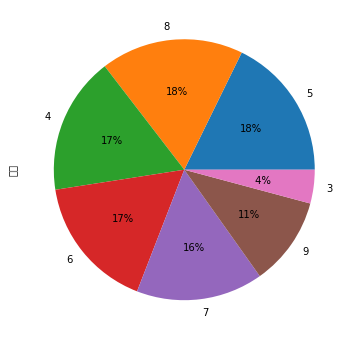

In [66]:
fdf['월별'].value_counts().plot(kind = 'pie', autopct = '%2.f%%', figsize = (10, 6), fontsize = 10)

<AxesSubplot:>

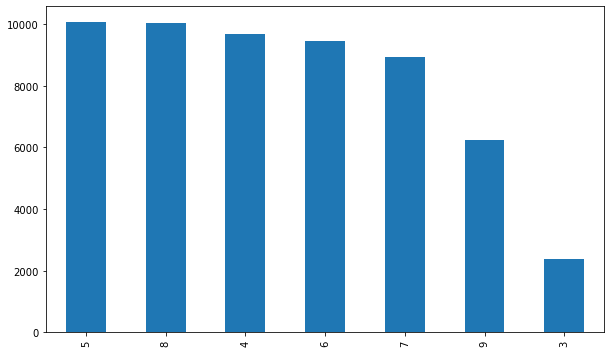

In [67]:
fdf['월별'].value_counts().plot(kind='bar', figsize = (10, 6), fontsize = 10)

<AxesSubplot:>

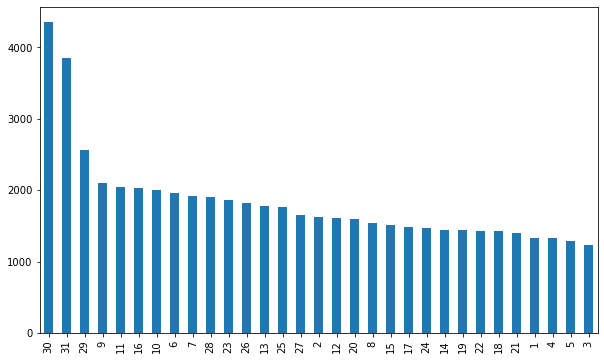

In [68]:
fdf['일별'].value_counts().plot(kind='bar', figsize = (10, 6), fontsize = 10)

<AxesSubplot:>

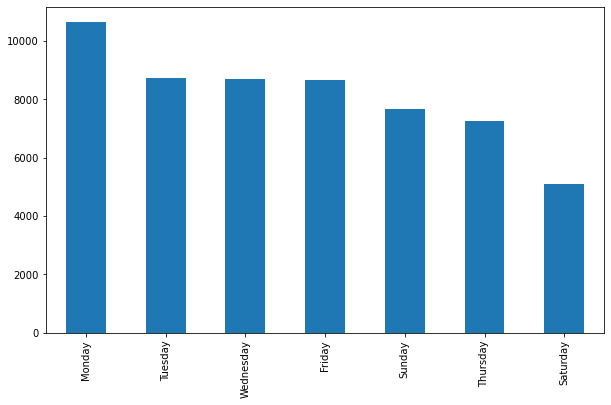

In [69]:
fdf['요일별'].value_counts().plot(kind='bar', figsize = (10, 6), fontsize = 10)

<AxesSubplot:>

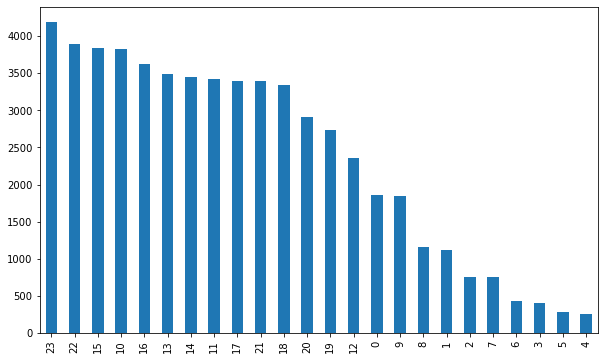

In [70]:
fdf['hour'].value_counts().plot(kind='bar', figsize = (10, 6), fontsize = 10)

## 특정 요일, 시간을 강조할만한 시각화